In [1]:
# Import packages that will be used for the logistics regression analysis
import pylab
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.core.display import HTML
from IPython.display import display
import pandas as pd
from pandas.api.types import CategoricalDtype
from pandas import Series, DataFrame
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Import data set that will be used for the logistics regression analysis
pd.set_option('display.max_columns', None)
df = pd.read_csv (r'C:\Users\fahim\Documents\0_WGUDocuments\d208\1medical_clean.csv')
# Check data types and number of values, as well as overall size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [2]:
# Visually inspect dataframe to facilitate exploration, spot problems
pd.set_option("display.max_columns", None)
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [3]:
#check if there is any duplicate data entries present in columns
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [4]:
# check if there are any duplicated columns in the data set - if there are none then the output should be False
df.columns.duplicated().any()

False

In [5]:
# check if there are any duplicated rows in the data set - if there are none then the output should be False
df.duplicated().any()

False

In [6]:
#Summary Statistics
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [7]:
df.Gender.value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

In [8]:
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [9]:
df.Initial_admin.value_counts().sort_index()

Elective Admission       2504
Emergency Admission      5060
Observation Admission    2436
Name: Initial_admin, dtype: int64

In [10]:
df.HighBlood.value_counts()

No     5910
Yes    4090
Name: HighBlood, dtype: int64

In [11]:
df.Complication_risk.value_counts().sort_index()

High      3358
Low       2125
Medium    4517
Name: Complication_risk, dtype: int64

In [12]:
df.Overweight.value_counts()

Yes    7094
No     2906
Name: Overweight, dtype: int64

In [13]:
df.BackPain.value_counts()

No     5886
Yes    4114
Name: BackPain, dtype: int64

In [14]:
df.Diabetes.value_counts()

No     7262
Yes    2738
Name: Diabetes, dtype: int64

In [15]:
df.Asthma.value_counts()

No     7107
Yes    2893
Name: Asthma, dtype: int64

In [16]:
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [17]:
df.Initial_days.nlargest(n=20)

7968    71.98149
5326    71.96869
7479    71.96546
6166    71.96415
8066    71.96342
5874    71.96164
5829    71.96134
9159    71.95813
8817    71.95472
7524    71.94732
9074    71.94459
7839    71.92930
9677    71.92647
9221    71.92413
5162    71.92171
9101    71.90712
9766    71.90694
5374    71.90056
6601    71.89863
7214    71.89805
Name: Initial_days, dtype: float64

In [18]:
df.Arthritis.value_counts()

No     6426
Yes    3574
Name: Arthritis, dtype: int64

In [19]:
# Data Preparation for analysis
# Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")
# Reformat column representing currency in USD to 3 decimal places from 6
df["Income"] = df["Income"].astype(int)
# Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
# Convert column to category from string
df["Gender"] = df["Gender"].astype("category")

# Convert categorical yes/no values to numeric 1/0 values
df = df.replace(to_replace = ['Yes','No'],value = [1,0])

# Perform one-hot encoding
# Generate columns of dummy values for dataframe's Gender column
gender_temp_df = pd.get_dummies(data=df["Gender"], drop_first=True)
# Generate columns of dummy values for dataframe's Initial_admin column
initial_admit_temp_df = pd.get_dummies(data=df["Initial_admin"], drop_first=True)
# Generate columns of dummy values for dataframe's Complication_risk column
comp_risk_temp_df = pd.get_dummies(data=df["Complication_risk"], drop_first=True)
# Create the new df with the variables used for this analysis
regress_df = df[["Age", "VitD_levels", "HighBlood", "Overweight", "Arthritis", "Diabetes", "BackPain", "Asthma", "Initial_days"]]
# Generate and apply new Pythonic names for ease of use
pythonic_columns = ["age", "vit_d_level", "high_bp", "overweight", "arthritis", "diabetes", "back_pain", "asthma", "days_hospitalized"]
regress_df.set_axis(pythonic_columns, axis=1, inplace=True)
# Insert the generated dummy variables to new dataframe, placing them in the same order as the original dataframe
# Dummies for Complication Risk
regress_df.insert(4, "comp_risk_medium", comp_risk_temp_df.Medium)
regress_df.insert(4, "comp_risk_low", comp_risk_temp_df.Low)
# Dummies for Initial Admit
regress_df.insert(3, "initial_admit_emerg", initial_admit_temp_df["Emergency Admission"])
regress_df.insert(3, "initial_admit_observ", initial_admit_temp_df["Observation Admission"])
# Dummies for Gender
regress_df.insert(2, "gender_nonbinary", gender_temp_df.Nonbinary)
regress_df.insert(2, "gender_male", gender_temp_df.Male)
# Check resulting dataframe
regress_df

,age,vit_d_level,gender_male,gender_nonbinary,high_bp,initial_admit_observ,initial_admit_emerg,overweight,comp_risk_low,comp_risk_medium,arthritis,diabetes,back_pain,asthma,days_hospitalized
0,53,19.141466,1,0,1,0,1,0,0,1,1,1,1,1,10.585770
1,51,18.940352,0,0,1,0,1,1,0,0,0,0,0,0,15.129562
2,53,18.057507,0,0,1,0,0,1,0,1,0,1,0,0,4.772177
3,78,16.576858,1,0,0,0,0,0,0,1,1,0,0,1,1.714879
4,22,17.439069,0,0,0,0,0,0,1,0,0,0,0,0,1.254807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,16.980860,1,0,1,0,1,0,0,1,0,0,0,0,51.561220
9996,87,18.177020,1,0,1,0,0,1,0,1,1,1,0,1,68.668240
9997,45,17.129070,0,0,1,0,0,1,0,0,0,0,0,0,70.154180
9998,43,19.910430,1,0,0,0,1,1,0,1,0,0,1,0,63.356900


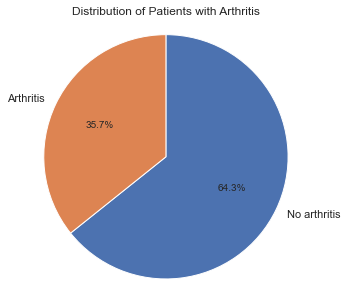

In [20]:
#Bivariate distribution of Arthritis
plt.figure(figsize = [16,5])
plt.title('Distribution of Patients with Arthritis')
arthritis_counts = regress_df.arthritis.value_counts()
arthritis_labels = ["No arthritis", "Arthritis"]
plt.pie(arthritis_counts, labels=arthritis_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');

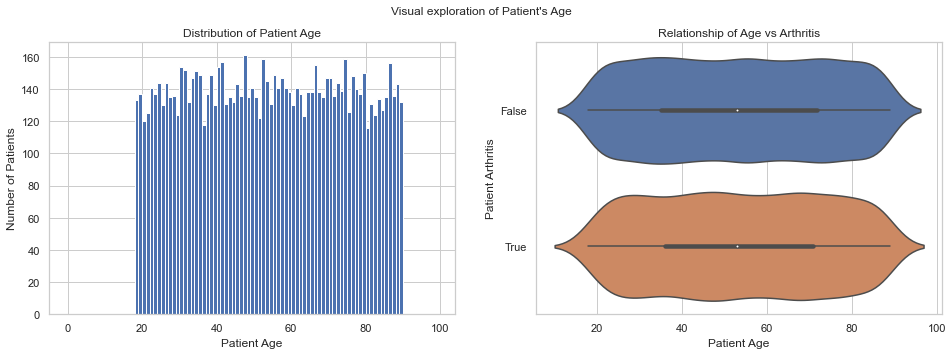

In [21]:
#Univariate and bivariate distribution of Age
plt.figure(figsize = [16,5])
plt.suptitle("Visual exploration of Patient's Age")

# LEFT plot: Univariate exploration of age
plt.subplot(1, 2, 1)
plt.title('Distribution of Patient Age')
bins = np.arange(0, 100, 1)
plt.hist(data=regress_df, x="age", bins=bins)
plt.xlabel('Patient Age')
plt.ylabel("Number of Patients");

# RIGHT plot: Bivariate exploration of age vs arthritis
plt.subplot(1, 2, 2)
plt.title("Relationship of Age vs Arthritis")
sb.violinplot(data = regress_df, x="age", y="arthritis", orient='h')
plt.xlabel("Patient Age")
plt.ylabel("Patient Arthritis")
plt.yticks([0,1], ["False", "True"]);

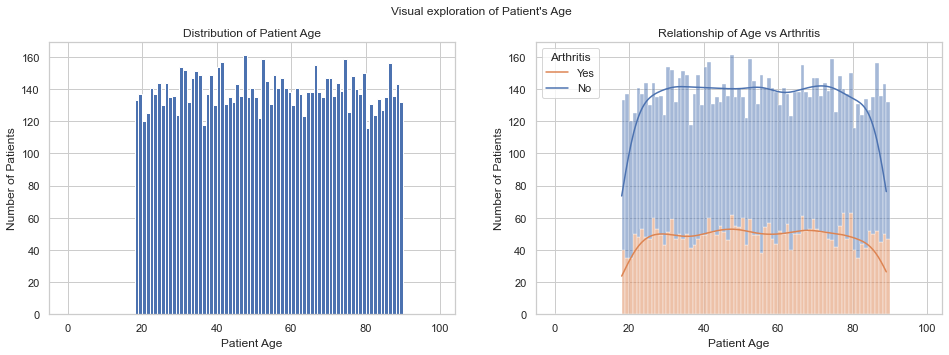

In [22]:
plt.figure(figsize = [16,5])
plt.suptitle("Visual exploration of Patient's Age")

# LEFT plot: Univariate exploration of age
plt.subplot(1, 2, 1)
plt.title('Distribution of Patient Age')
bins = np.arange(0, 100, 1)
plt.hist(data=regress_df, x="age", bins=bins)
plt.xlabel('Patient Age')
plt.ylabel("Number of Patients");

# RIGHT plot: Bivariate exploration of age vs arthritis
plt.subplot(1, 2, 2)
plt.title("Relationship of Age vs Arthritis")
sb.histplot(data = regress_df, x="age", hue="arthritis", bins=bins, kde=True, multiple="stack")
plt.legend(title="Arthritis", labels=["Yes", "No"])
plt.xlabel("Patient Age")
plt.ylabel("Number of Patients");

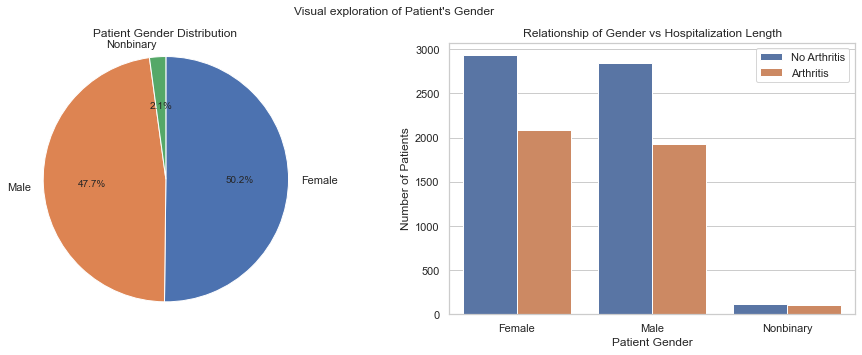

In [23]:
#Univariate and bivariate distribution of Gender
plt.figure(figsize = [16,5])
plt.suptitle("Visual exploration of Patient's Gender")

# LEFT plot: Univariate exploration of num_children
plt.subplot(1, 2, 1)
plt.title("Patient Gender Distribution")
gender_counts = df["Gender"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# RIGHT plot: Bivariate exploration of num_children vs arthritis
plt.subplot(1, 2, 2)
plt.title("Relationship of Gender vs Hospitalization Length")
sb.countplot(data = df, x="Gender", hue="BackPain")
plt.legend(["No Arthritis", "Arthritis"])
plt.xlabel("Patient Gender")
plt.ylabel("Number of Patients");

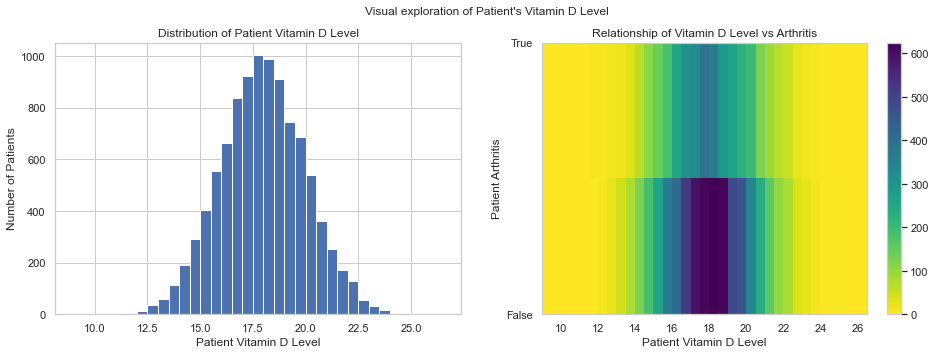

In [24]:
#Univariate and bivariate distribution of Vitamin D Level
plt.figure(figsize = [16,5])
plt.suptitle("Visual exploration of Patient's Vitamin D Level")

# LEFT plot: Univariate exploration of vit_d_level
plt.subplot(1, 2, 1)
plt.title('Distribution of Patient Vitamin D Level')
bins = np.arange(9, 27, 0.5)
plt.hist(data=regress_df, x="vit_d_level", bins=bins)
plt.xlabel('Patient Vitamin D Level')
plt.ylabel("Number of Patients");

# RIGHT plot: Bivariate exploration of vit_d_level vs arthritis
plt.subplot(1, 2, 2)
plt.title("Relationship of Vitamin D Level vs Arthritis")
bins_y = np.arange(0, 1.25, 0.5)
plt.hist2d(data= regress_df, x="vit_d_level", y="arthritis", bins=[bins, bins_y], cmap= "viridis_r")
plt.colorbar()
plt.xlabel("Patient Vitamin D Level")
plt.ylabel("Patient Arthritis")
plt.yticks([0,1], ["False", "True"]);

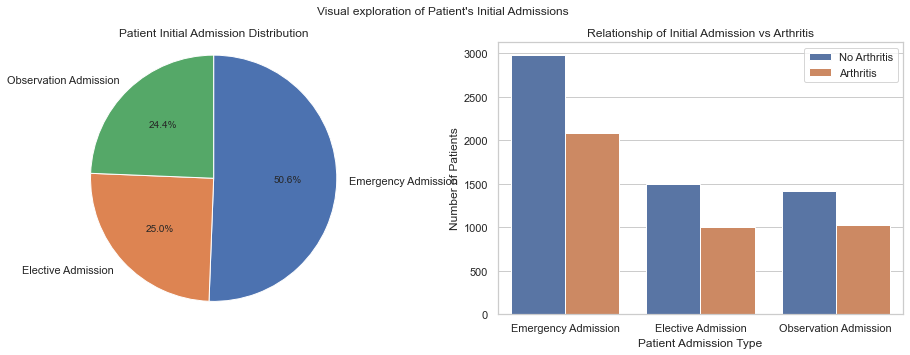

In [25]:
#Univariate and bivariate distribution of Initial Admissions
plt.figure(figsize = [16,5])
plt.suptitle("Visual exploration of Patient's Initial Admissions")

# LEFT plot: Univariate exploration of initial_admin
plt.subplot(1, 2, 1)
plt.title("Patient Initial Admission Distribution")
init_admit_counts = df["Initial_admin"].value_counts()
plt.pie(init_admit_counts, labels=init_admit_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# RIGHT plot: Bivariate exploration of Initial_admin vs arthritis
plt.subplot(1, 2, 2)
plt.title("Relationship of Initial Admission vs Arthritis")
sb.countplot(data = df, x="Initial_admin", hue="BackPain")
plt.legend(["No Arthritis", "Arthritis"])
plt.xlabel("Patient Admission Type")
plt.ylabel("Number of Patients");

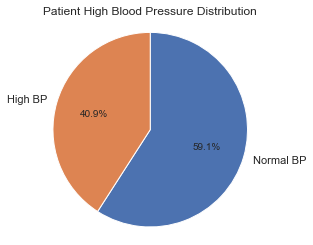

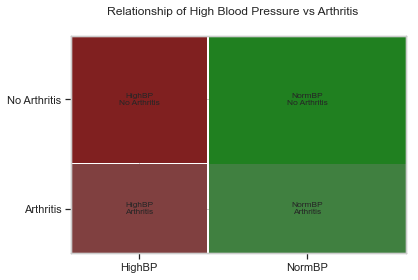

In [26]:
#Univariate and bivariate distribution of High Blood pressure
# TOP plot: Univariate exploration of high bp
plt.title("Patient High Blood Pressure Distribution")
high_bp_counts = df["HighBlood"].value_counts()
plt.pie(high_bp_counts, labels=["Normal BP", "High BP"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# BOTTOM plot: Bivariate exploration of high bp vs arthritis
temp_df = df[["HighBlood", "BackPain"]].copy()
high_bp_map = {1 : "HighBP", 0: "NormBP"}
arthritis_map = {1 : "Arthritis", 0: "No Arthritis"}
temp_df["HighBlood"] = temp_df["HighBlood"].map(high_bp_map)
temp_df["BackPain"] = temp_df["BackPain"].map(arthritis_map)
mosaic(temp_df, ["HighBlood", "BackPain"])
plt.suptitle("Relationship of High Blood Pressure vs Arthritis");

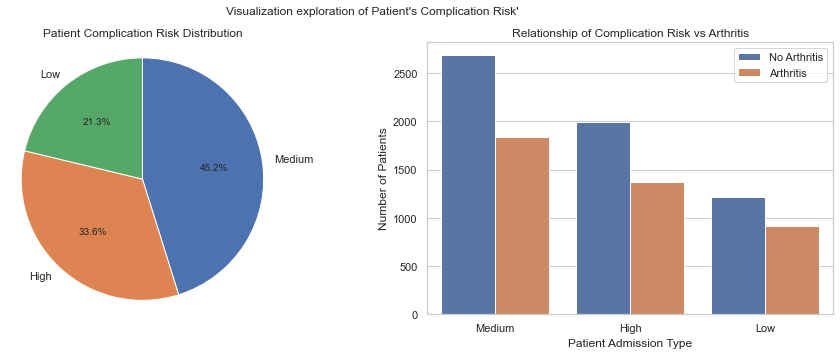

In [27]:
#Univariate and bivariate distribution of Complication Risk
plt.figure(figsize = [16,5])
plt.suptitle("Visualization exploration of Patient's Complication Risk'")

# LEFT plot: Univariate exploration of complication_risk
plt.subplot(1, 2, 1)
plt.title("Patient Complication Risk Distribution")
comp_risk_counts = df["Complication_risk"].value_counts()
comp_risk_labels = ["Medium", "High", "Low"]
plt.pie(comp_risk_counts, labels=comp_risk_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# RIGHT plot: Bivariate exploration of complication_risk vs arthritis
plt.subplot(1, 2, 2)
plt.title("Relationship of Complication Risk vs Arthritis")
sb.countplot(data = df, x="Complication_risk", hue="BackPain")
plt.legend(["No Arthritis", "Arthritis"])
plt.xlabel("Patient Admission Type")
plt.ylabel("Number of Patients");

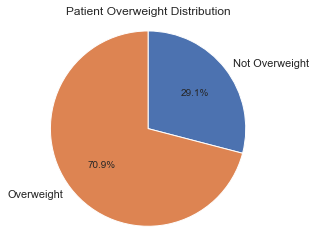

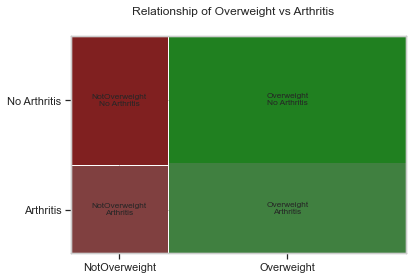

In [28]:
#Univariate and bivariate distribution of Overweight
# TOP plot: Univariate exploration of overweight
plt.title("Patient Overweight Distribution")
overweight_counts = df["Overweight"].value_counts().sort_index()
plt.pie(overweight_counts, labels=["Not Overweight", "Overweight"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# BOTTOM plot: Bivariate exploration of overweight vs arthritis
temp_df = df[["Overweight", "BackPain"]].copy()
overweight_map = {1 : "Overweight", 0: "NotOverweight"}
arthritis_map = {1 : "Arthritis", 0: "No Arthritis"}
temp_df["Overweight"] = temp_df["Overweight"].map(overweight_map)
temp_df["BackPain"] = temp_df["BackPain"].map(arthritis_map)
mosaic(temp_df, ["Overweight", "BackPain"])
plt.suptitle("Relationship of Overweight vs Arthritis");

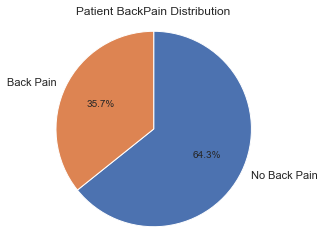

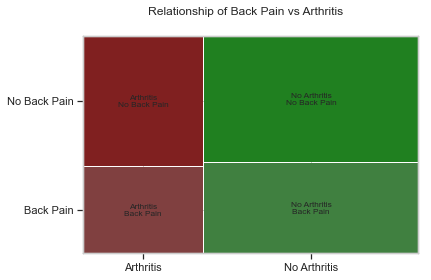

In [29]:
#Univariate and bivariate distribution of BackPain
# TOP plot: Univariate exploration of arthritis
plt.title("Patient BackPain Distribution")
back_pain_counts = df["BackPain"].value_counts().sort_index()
plt.pie(arthritis_counts, labels=["No Back Pain", "Back Pain"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# BOTTOM plot: Bivariate exploration of arthritis vs back_pain
temp_df = df[["Arthritis", "BackPain"]].copy()
back_pain_map = {1 : "Back Pain", 0: "No Back Pain"}
arthritis_map = {1 : "Arthritis", 0: "No Arthritis"}
temp_df["BackPain"] = temp_df["BackPain"].map(back_pain_map)
temp_df["Arthritis"] = temp_df["Arthritis"].map(arthritis_map)
mosaic(temp_df, ["Arthritis", "BackPain"])
plt.suptitle("Relationship of Back Pain vs Arthritis");

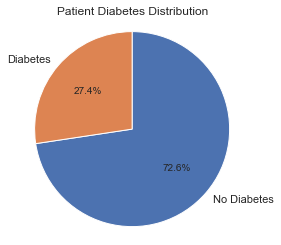

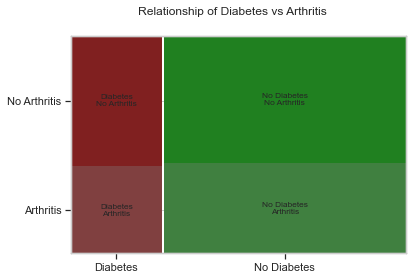

In [30]:
#Univariate and bivariate distribution of Diabetes
# TOP plot: Univariate exploration of diabetes
plt.title("Patient Diabetes Distribution")
diabetes_counts = df["Diabetes"].value_counts().sort_index()
plt.pie(diabetes_counts, labels=["No Diabetes", "Diabetes"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# BOTTOM plot: Bivariate exploration of diabetes vs arthritis
temp_df = df[["Diabetes", "BackPain"]].copy()
diabetes_map = {1 : "Diabetes", 0: "No Diabetes"}
arthritis_map = {1 : "Arthritis", 0: "No Arthritis"}
temp_df["Diabetes"] = temp_df["Diabetes"].map(diabetes_map)
temp_df["BackPain"] = temp_df["BackPain"].map(arthritis_map)
mosaic(temp_df, ["Diabetes", "BackPain"])
plt.suptitle("Relationship of Diabetes vs Arthritis");

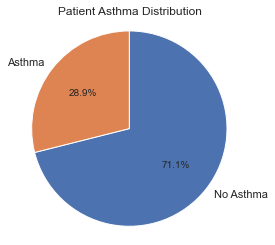

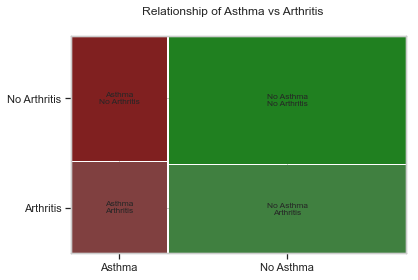

In [31]:
#Univariate and bivariate distribution of Asthma
# TOP plot: Univariate exploration of asthma
plt.title("Patient Asthma Distribution")
asthma_counts = df["Asthma"].value_counts()
plt.pie(asthma_counts, labels=["No Asthma", "Asthma"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# BOTTOM plot: Bivariate exploration of asthma vs arthritis
temp_df = df[["Asthma", "BackPain"]].copy()
asthma_map = {1 : "Asthma", 0: "No Asthma"}
arthritis_map = {1 : "Arthritis", 0: "No Arthritis"}
temp_df["Asthma"] = temp_df["Asthma"].map(asthma_map)
temp_df["BackPain"] = temp_df["BackPain"].map(arthritis_map)
mosaic(temp_df, ["Asthma", "BackPain"])
plt.suptitle("Relationship of Asthma vs Arthritis");

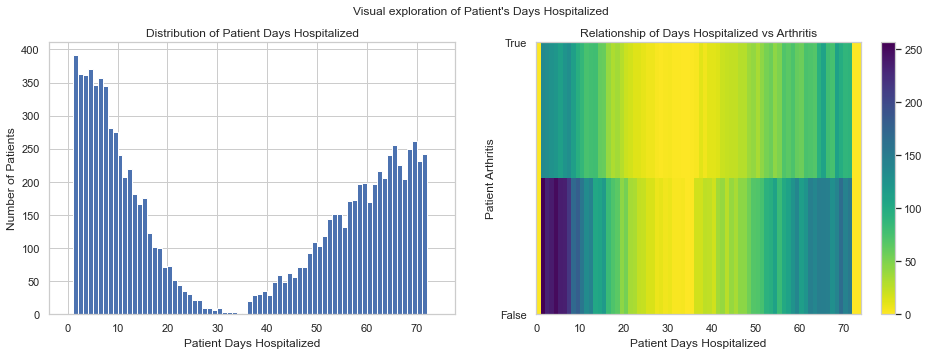

In [32]:
#Univariate and bivariate distribution of Days Hospitalized
plt.figure(figsize = [16,5])
plt.suptitle("Visual exploration of Patient's Days Hospitalized")

# LEFT plot: Univariate exploration of days_hospitalized
plt.subplot(1, 2, 1)
plt.title('Distribution of Patient Days Hospitalized')
bins = np.arange(0, 75, 1)
plt.hist(data=regress_df, x="days_hospitalized", bins=bins)
plt.xlabel('Patient Days Hospitalized')
plt.ylabel("Number of Patients");

# RIGHT plot: Bivariate exploration of days_hospitalized vs arthritis
plt.subplot(1, 2, 2)
plt.title("Relationship of Days Hospitalized vs Arthritis")
bins_y = np.arange(0, 1.25, 0.5)
plt.hist2d(data= regress_df, x="days_hospitalized", y="arthritis", bins=[bins, bins_y], cmap= "viridis_r")
plt.colorbar()
plt.xlabel("Patient Days Hospitalized")
plt.ylabel("Patient Arthritis")
plt.yticks([0,1], ["False", "True"]);

In [33]:
# Save dataframe to CSV
df.to_csv('d208task2_full_clean.csv', index=False)

# Save dataframe to CSV
regress_df.to_csv('d208task2_red_clean.csv', index=False)

In [34]:
# Check for VIF to determine if variables should be eliminated due to high multicolinearity
# Selecting the features for VIF calculation
X = regress_df[["age", "gender_male", "gender_nonbinary", "vit_d_level", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "back_pain", "diabetes", "asthma", "days_hospitalized"]]

# Calculating VIF for each feature
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

                 feature        vif
0                    age   7.241869
1            gender_male   1.925995
2       gender_nonbinary   1.043023
3            vit_d_level  16.271274
4   initial_admit_observ   1.937244
5    initial_admit_emerg   2.958304
6                high_bp   1.686147
7          comp_risk_low   1.616292
8       comp_risk_medium   2.314051
9             overweight   3.371494
10             back_pain   1.691642
11              diabetes   1.368503
12                asthma   1.404802
13     days_hospitalized   2.671751


In [35]:
#Create the Initial Logistic Regression model
y = regress_df.arthritis
X = regress_df[["age", "gender_male", "gender_nonbinary", "vit_d_level", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "back_pain", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651068
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              arthritis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                0.001288
Time:                        19:14:59   Log-Likelihood:                -6510.7
converged:                       True   LL-Null:                       -6519.1
Covariance Type:            nonrobust   LLR p-value:                    0.2675
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                      0.0008      0.001      0.747      0.455      -0.001       0.003

In [36]:
# Check for VIF to see if variables should be eliminated due to high multicolinearity
X = regress_df[["age", "gender_male", "gender_nonbinary", "vit_d_level", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "back_pain", "diabetes", "asthma", "days_hospitalized"]]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                 feature        VIF
0                    age   7.241869
1            gender_male   1.925995
2       gender_nonbinary   1.043023
3            vit_d_level  16.271274
4   initial_admit_observ   1.937244
5    initial_admit_emerg   2.958304
6                high_bp   1.686147
7          comp_risk_low   1.616292
8       comp_risk_medium   2.314051
9             overweight   3.371494
10             back_pain   1.691642
11              diabetes   1.368503
12                asthma   1.404802
13     days_hospitalized   2.671751


In [37]:
# Eliminated vit_d_level (VIF = 16.271274), rerunning analysis to see if any VIF still above 10 
X = regress_df[["age", "gender_male", "gender_nonbinary", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "back_pain", "diabetes", "asthma", "days_hospitalized"]]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                 feature       VIF
0                    age  5.106574
1            gender_male  1.841550
2       gender_nonbinary  1.039726
3   initial_admit_observ  1.777416
4    initial_admit_emerg  2.587708
5                high_bp  1.644376
6          comp_risk_low  1.548105
7       comp_risk_medium  2.162291
8             overweight  3.028072
9              back_pain  1.658025
10              diabetes  1.350051
11                asthma  1.385518
12     days_hospitalized  2.493187


In [38]:
# BACKWARD ELIMINATION # 1: Seek highest p-value above 0.10
y = regress_df.arthritis
X = regress_df[["age", "gender_male", "gender_nonbinary", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "back_pain", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651068
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              arthritis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                0.001288
Time:                        19:14:59   Log-Likelihood:                -6510.7
converged:                       True   LL-Null:                       -6519.1
Covariance Type:            nonrobust   LLR p-value:                    0.2091
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                      0.0008      0.001      0.747      0.455      -0.001       0.003

In [39]:
# BACKWARD ELIMINATION # 2: Seek highest p-value above 0.10 (eliminated initial_admit_emerg, p-value of 0.992)
y = regress_df.arthritis
X = regress_df[["age", "gender_male", "gender_nonbinary", "initial_admit_observ", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "back_pain", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651068
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              arthritis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                0.001288
Time:                        19:14:59   Log-Likelihood:                -6510.7
converged:                       True   LL-Null:                       -6519.1
Covariance Type:            nonrobust   LLR p-value:                    0.1577
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                      0.0008      0.001      0.747      0.455      -0.001       0.003

In [40]:
# BACKWARD ELIMINATION # 3: Seek highest p-value above 0.10 (eliminated initial_admit_observ, p-value of 0.994)
y = regress_df.arthritis
X = regress_df[["age", "gender_male", "gender_nonbinary", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "back_pain", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651068
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              arthritis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                0.001288
Time:                        19:14:59   Log-Likelihood:                -6510.7
converged:                       True   LL-Null:                       -6519.1
Covariance Type:            nonrobust   LLR p-value:                    0.1142
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0008      0.001      0.747      0.455      -0.001       0.003
gender_m

In [41]:
# BACKWARD ELIMINATION # 4: Seek highest p-value above 0.10 (eliminated overweight, p-value of 0.686)
y = regress_df.arthritis
X = regress_df[["age", "gender_male", "gender_nonbinary", "high_bp", "comp_risk_low", "comp_risk_medium", "back_pain", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651076
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              arthritis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                0.001275
Time:                        19:15:00   Log-Likelihood:                -6510.8
converged:                       True   LL-Null:                       -6519.1
Covariance Type:            nonrobust   LLR p-value:                   0.08303
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0008      0.001      0.743      0.457      -0.001       0.003
gender_m

In [42]:
# BACKWARD ELIMINATION # 5: Seek highest p-value above 0.10 (eliminated asthma, p-value of 0.518)
y = regress_df.arthritis
X = regress_df[["age", "gender_male", "gender_nonbinary", "high_bp", "comp_risk_low", "comp_risk_medium", "back_pain", "diabetes", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651097
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              arthritis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                0.001243
Time:                        19:15:00   Log-Likelihood:                -6511.0
converged:                       True   LL-Null:                       -6519.1
Covariance Type:            nonrobust   LLR p-value:                   0.06265
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0007      0.001      0.737      0.461      -0.001       0.003
gender_m

In [43]:
# BACKWARD ELIMINATION # 6: Seek highest p-value above 0.10 (eliminated age, p-value of 0.461)
y = regress_df.arthritis
X = regress_df[["gender_male", "gender_nonbinary", "high_bp", "comp_risk_low", "comp_risk_medium", "back_pain", "diabetes", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651124
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              arthritis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                0.001201
Time:                        19:15:00   Log-Likelihood:                -6511.2
converged:                       True   LL-Null:                       -6519.1
Covariance Type:            nonrobust   LLR p-value:                   0.04744
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
gender_male           0.0389      0.042      0.921      0.357      -0.044       0.122
gender_n

In [44]:
# BACKWARD ELIMINATION # 7: Seek highest p-value above 0.10 (eliminated gender_male, p-value of 0.357)
y = regress_df.arthritis
X = regress_df[["gender_nonbinary", "high_bp", "comp_risk_low", "comp_risk_medium", "back_pain", "diabetes", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651167
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              arthritis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                0.001136
Time:                        19:15:00   Log-Likelihood:                -6511.7
converged:                       True   LL-Null:                       -6519.1
Covariance Type:            nonrobust   LLR p-value:                   0.03842
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
gender_nonbinary      0.1790      0.141      1.266      0.206      -0.098       0.456
high_bp 

In [45]:
# BACKWARD ELIMINATION # 8: Seek highest p-value above 0.10 (eliminated high_bp, p-value of 0.459)
y = regress_df.arthritis
X = regress_df[["gender_nonbinary", "comp_risk_low", "comp_risk_medium", "back_pain", "diabetes", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651194
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              arthritis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                0.001094
Time:                        19:15:00   Log-Likelihood:                -6511.9
converged:                       True   LL-Null:                       -6519.1
Covariance Type:            nonrobust   LLR p-value:                   0.02678
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
gender_nonbinary      0.1806      0.141      1.277      0.202      -0.097       0.458
comp_ris

In [46]:
# BACKWARD ELIMINATION # 9: Seek highest p-value above 0.10 (eliminated diabetes, p-value of 0.376)
y = regress_df.arthritis
X = regress_df[["gender_nonbinary", "comp_risk_low", "comp_risk_medium", "back_pain", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651233
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              arthritis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                0.001034
Time:                        19:15:01   Log-Likelihood:                -6512.3
converged:                       True   LL-Null:                       -6519.1
Covariance Type:            nonrobust   LLR p-value:                   0.01923
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
gender_nonbinary      0.1803      0.141      1.275      0.202      -0.097       0.457
comp_ris

In [47]:
# BACKWARD ELIMINATION # 10: Seek highest p-value above 0.10 (eliminated comp_risk_low, p-value of 0.203)
y = regress_df.arthritis
X = regress_df[["gender_nonbinary", "comp_risk_medium", "back_pain", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651314
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              arthritis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:               0.0009100
Time:                        19:15:01   Log-Likelihood:                -6513.1
converged:                       True   LL-Null:                       -6519.1
Covariance Type:            nonrobust   LLR p-value:                   0.01839
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
gender_nonbinary      0.1784      0.141      1.262      0.207      -0.099       0.456
comp_ris

In [48]:
# BACKWARD ELIMINATION # 11: Seek highest p-value above 0.10 (eliminated gender_nonbinary, p-value of 0.207)
y = regress_df.arthritis
X = regress_df[["comp_risk_medium", "back_pain", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651393
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              arthritis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:               0.0007894
Time:                        19:15:01   Log-Likelihood:                -6513.9
converged:                       True   LL-Null:                       -6519.1
Covariance Type:            nonrobust   LLR p-value:                   0.01624
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
comp_risk_medium      0.0732      0.042      1.747      0.081      -0.009       0.155
back_pai

In [49]:
# All p-values for independent variables are < 0.10, this is the final reduced model
y = regress_df.arthritis
X = regress_df[["comp_risk_medium", "back_pain", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651393
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              arthritis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:               0.0007894
Time:                        19:15:01   Log-Likelihood:                -6513.9
converged:                       True   LL-Null:                       -6519.1
Covariance Type:            nonrobust   LLR p-value:                   0.01624
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
comp_risk_medium      0.0732      0.042      1.747      0.081      -0.009       0.155
back_pai

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
final_matrix = confusion_matrix(y_test, y_pred)
print(final_matrix)

Accuracy of logistic regression classifier on test set: 0.66
[[1319    0]
 [ 681    0]]


In [51]:
result.params

comp_risk_medium     0.073224
back_pain           -0.080667
days_hospitalized    0.001541
const               -0.640284
dtype: float64

In [52]:
# Calculate odds ratios for each coefficient
print(f"The odds ratio for comp_risk_medium is {round(np.exp(0.073224), 3)}. Given this, the change in odds for arthritis is {round((np.exp(0.073224) - 1) * 100, 3)}")
print(f"The odds ratio for back_pain is {round(np.exp(0.080667), 3)}. Given this, the change in odds for arthritis is {round((np.exp(0.080667) - 1) * 100, 3)}")
print(f"The odds ratio for days_hospitalized is {round(np.exp (0.001541), 3)}. Given this, the change in odds for arthritis is {round((np.exp( 0.001541) - 1) * 100, 3)}")

The odds ratio for comp_risk_medium is 1.076. Given this, the change in odds for arthritis is 7.597
The odds ratio for back_pain is 1.084. Given this, the change in odds for arthritis is 8.401
The odds ratio for days_hospitalized is 1.002. Given this, the change in odds for arthritis is 0.154
